##WM - J - COMP - PREDICT MVP OF NBA 22-23 <br>
<br>
<H3>
Team Members : <br>
VINAY VITTAL MOOLYA (20BCE1318)<BR>
RAJAT MISHRA (20BCE1251)</H3>

FOR THIS PROJECT WE WILL BE SCRAPING THE DATA FROM ONLINE SITE WHICH CONTAINS ALL THE STATISTICS FOR ALL PLAYERS IN THE NBA SEASON.

The Link we are referring to :: https://basketball.realgm.com/nba/stats



Getting the TRAINING DATASET ON WHICH WE WILL BE TRAINING OUR MODEL

In [240]:
#importing all the necessary libraries
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd

# BEFORE JUMPING INTO THE PRESENT DATA WE WILL BE USING THE PAST DATA FOR TRAINING OUR MODEL WHICH CONTAINS THE TOP 12-15 MVP's FROM 1991 TILL 2021

# THIS WOULD HELP THE MODEL THE KNOW THE IMPACT FACTORS OF MVP PREDICTION.

#GETTING THE TRAINING DATA FROM INTERNET

training_url = "https://raw.githubusercontent.com/dataquestio/project-walkthroughs/master/mvp/player_mvp_stats.csv"

training_data = pd.read_csv(training_url)
training_data = training_data.drop("Unnamed: 0",axis=1)

print("*"*135)
print("The Training Dataset :: \n")
print("This data contains all the performance statistics of all the players who played in the NBA season from 1991 to 2021 of all the teams ... ")
print("*"*135)
display(training_data)
print("*"*135)

***************************************************************************************************************************************
The Training Dataset :: 

This data contains all the performance statistics of all the players who played in the NBA season from 1991 to 2021 of all the teams ... 
***************************************************************************************************************************************


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,0.492,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,0.484,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14088,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,0.286,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14089,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,0.470,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14090,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,0.459,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45


***************************************************************************************************************************************


In [241]:
print(training_data.columns)

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS'],
      dtype='object')


PREPROCESSING THE TRAINING DATASET

In [242]:
# PREPROCESSING THE DATA

print("PREPROCESSING THE DATA\n")
print("*"*135)

print("Getting the columns with maximum NA values :: \n")
print("*"*50)
print(training_data.isna().sum())
print("*"*50)
print("As only 4-5 of the columns were filled with NULL which may be due to data fetching error ...\nWe will be filling them with 0s.. as other factors in the data are equivally important for us .. \n")
print("*"*50)
print("Filling NA's with 0 .....")
training_data = training_data.fillna(0)


PREPROCESSING THE DATA

***************************************************************************************************************************************
Getting the columns with maximum NA values :: 

**************************************************
Player        0
Pos           0
Age           0
Tm            0
G             0
GS            0
MP            0
FG            0
FGA           0
FG%          50
3P            0
3PA           0
3P%        2042
2P            0
2PA           0
2P%          84
eFG%         50
FT            0
FTA           0
FT%         462
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Year          0
Pts Won       0
Pts Max       0
Share         0
Team          0
W             0
L             0
W/L%          0
GB            0
PS/G          0
PA/G          0
SRS           0
dtype: int64
**************************************************
As only 4-5 of the co

TRAINING THE MODEL using SVR

In [3]:
training_data.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,0.492,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73


In [243]:
from sklearn.preprocessing import LabelEncoder

training_data_svr = training_data.copy()

LE = LabelEncoder()

training_data_svr['Pos'] = LE.fit_transform(training_data_svr['Pos'])
training_data_svr['Tm'] = LE.fit_transform(training_data_svr['Tm'])

training_data_svr = training_data_svr.drop(['Team', 'W', 'L', 'FG', 'FGA', '3P', '3PA', '2P','2P%', '2PA', 'FT', 'FTA', 'GB','W/L%','PS/G','PA/G','SRS','PTS','Pts Max','Pts Won','Age','Tm','Pos','GS','eFG%'], axis=1)
display(training_data_svr.sort_values("Share",ascending = False))

,Player,G,MP,FG%,3P%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,Year,Share
5562,Stephen Curry,79,34.2,0.504,0.454,0.908,0.9,4.6,5.4,6.7,2.1,0.2,3.3,2.0,2016,1.000
143,Shaquille O'Neal,79,40.0,0.574,0.000,0.524,4.3,9.4,13.6,3.8,0.5,3.0,2.8,3.2,2000,0.998
12974,LeBron James,76,37.9,0.565,0.406,0.753,1.3,6.8,8.0,7.3,1.7,0.9,3.0,1.4,2013,0.998
13783,Kevin Garnett,82,39.4,0.499,0.256,0.791,3.0,10.9,13.9,5.0,1.5,2.2,2.6,2.5,2004,0.991
6300,Kevin Durant,81,38.5,0.503,0.391,0.873,0.7,6.7,7.4,5.5,1.3,0.7,3.5,2.1,2014,0.986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4759,Qyntel Woods,3,13.3,0.417,0.000,0.000,0.7,1.3,2.0,0.0,1.3,0.0,0.7,2.0,2005,0.000
4760,Rasual Butler,65,18.5,0.399,0.373,0.771,0.2,2.1,2.3,1.0,0.3,0.4,0.6,1.6,2005,0.000
4761,Shandon Anderson,66,17.7,0.452,0.172,0.818,0.6,2.3,2.9,1.1,0.6,0.2,0.8,2.1,2005,0.000
4763,Steve Smith,50,15.0,0.411,0.390,0.863,0.3,1.0,1.3,1.4,0.3,0.1,0.5,1.6,2005,0.000


In [244]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

x_train = training_data_svr[training_data_svr['Year'] < 2020].drop(['Year', 'Player'], axis=1)
y_train = x_train["Share"]
# x_train.drop(['Share'],axis = 1)
x_test = training_data_svr[training_data_svr['Year'] == 2021].drop('Year', axis=1)
players = x_test['Player']
x_test = x_test.drop('Player', axis=1)

y_test = x_test['Share']

# x_test.drop(['Share'],axis = 1)

regr = make_pipeline(StandardScaler(), SVR(C=1, epsilon=0.1, tol=1e-10))
regr.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=1, tol=1e-10))])

In [245]:
y_pred = regr.predict(x_test)
predictions = pd.DataFrame({"Player": players, "Share": y_test, "Predicition": y_pred})

print("Original Results :: ")
predictions = predictions.sort_values("Share",ascending = False)
display(predictions.head(15))
print("\nPredicted Results ::")
predictions = predictions.sort_values("Predicition",ascending = False)
display(predictions.head(15))


Original Results :: 


,Player,Share,Predicition
641,Nikola Jokić,0.961,0.782060
8624,Joel Embiid,0.580,0.464808
3651,Stephen Curry,0.449,0.338756
9907,Giannis Antetokounmpo,0.345,0.267589
1389,Chris Paul,0.138,0.120565
10997,Luka Dončić,0.042,0.091374
7464,Damian Lillard,0.038,0.061161
3536,Julius Randle,0.020,0.097313
3531,Derrick Rose,0.010,0.032852
11358,Rudy Gobert,0.008,0.097997



Predicted Results ::


,Player,Share,Predicition
641,Nikola Jokić,0.961,0.782060
8624,Joel Embiid,0.580,0.464808
3651,Stephen Curry,0.449,0.338756
9907,Giannis Antetokounmpo,0.345,0.267589
3862,Anžejs Pasečņiks,0.000,0.194288
9906,Elijah Bryant,0.000,0.137478
3876,Russell Westbrook,0.005,0.128771
1389,Chris Paul,0.138,0.120565
4172,DeAndre Jordan,0.000,0.109024
855,Myles Turner,0.000,0.104077


Checking the Error Metrics and Accuracy of the Model Chosen

In [246]:
# Error & Accuracy Block
def err_measures(predictions):
  actual = predictions.sort_values('Share',ascending = False).head(5)
  predicted = predictions.sort_values('Predicition',ascending = False)

  res = []
  found = 0 #how many ryt preds
  seen = 1 #how many checks done
  
  for index,row in predicted.iterrows():
    if row['Player'] in actual['Player'].values :
      found += 1
      res.append(found/seen)
    seen+=1
  return sum(res)/len(res)

print("The performance of the model :: ");
print("Performance :: ",(err_measures(predictions)*100.0) , "%")



The performance of the model :: 
Performance ::  92.5 %


Using Explainable AI to know how the model selects the best features for the fitting

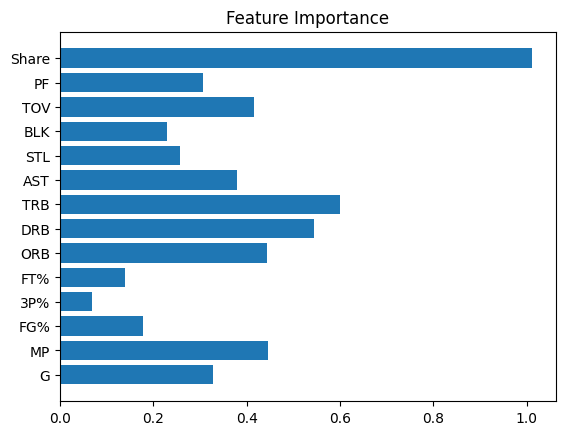

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

result = permutation_importance(regr,x_train,y_train,n_repeats=10, random_state=0)
importance = result.importances_mean

feature_names = x_train.columns
plt.barh(feature_names, importance)
plt.title('Feature Importance')
plt.show()

In [227]:
!pip install -U scikit-learn --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [231]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=91bb482b49a3cd75c0555274017f6740b1e13adc9b2a0790c7ecc4a3000cf756
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5


In [248]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(regr, random_state=42).fit(x_train, y_train)
eli5.show_weights(perm, feature_names = x_train.columns.tolist())

Weight,Feature
1.0071 ± 0.0323,Share
0.5979 ± 0.0150,TRB
0.5443 ± 0.0059,DRB
0.4494 ± 0.0095,ORB
0.4463 ± 0.0091,MP
0.4191 ± 0.0194,TOV
0.3744 ± 0.0112,AST
0.3287 ± 0.0081,G
0.3065 ± 0.0086,PF
0.2554 ± 0.0099,STL


Making Predictions for all the years from 1996 - 2021 using the data from 1991-2021

In [249]:
years = list(range(1991,2022))

yearlist = []
actual_mvp_list = []
pred_mvp_list = []
mvp_dataframe = pd.DataFrame()
all_err_measures = []
for year in years[5:] :
  x_train_all = training_data_svr[training_data_svr['Year'] < year].drop(['Year', 'Player'], axis=1)
  y_train_all = x_train_all['Share']
  # x_train_all = x_train_all.drop(["Share"],axis=1)
  x_test_all = training_data_svr[training_data_svr['Year'] == year].drop(['Year'],axis = 1)
  players = x_test_all['Player']
  x_test_all = x_test_all.drop('Player', axis=1)
  y_test_all = x_test_all['Share']
  # x_test_all = x_test_all.drop(["Share"],axis=1)
  regr.fit(x_train_all, y_train_all)
  y_pred = regr.predict(x_test_all)

  res = pd.DataFrame(y_pred,columns=['Predictions'], index = x_test_all.index)
  final_res = pd.DataFrame({"Player": players, "Share": y_test_all, "Predicition": y_pred})
  all_err_measures.append(err_measures(final_res))
  final_res = final_res.sort_values("Predicition",ascending = False)
  yearlist.append(year)
  pred_mvp_list.append(final_res["Player"].loc[final_res.index[0]])


print(sum(all_err_measures)/len(all_err_measures))



0.9415052065660182


**Verifying our Predicted results with Actual Realtime result from the past to get the Accuracy of the model**

In [250]:
mvp_test_url = "http://www.espn.com/nba/history/awards/_/id/33"

headers = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:79.0) Gecko/20100101 Firefox/79.0"}
req = requests.get(mvp_test_url,headers = headers)

soup = BeautifulSoup(req.content,'html.parser')

tbcontent = soup.find('table')

mvp_year = []
mvp = []

k=0
# we only need till year 1996 to compare our results
for row in tbcontent.find_all("tr",attrs={'class':'oddrow'}):
  if k == 27:
    break
  i=0
  for j in row.find_all('td'):
    if i == 0:
      mvp_year.append(j.text)
    elif i == 1:
      mvp.append(j.text)
    i+=1
  k+=1


rmvp = []
for ele in reversed(mvp):
  rmvp.append(ele)

data = {
    "Year" : yearlist,
    "Actual_MVP" : rmvp[:-1],
    "Predicted_MVP"  : pred_mvp_list
}
  
mvp_dataframe = pd.DataFrame(data)

display(mvp_dataframe)



,Year,Actual_MVP,Predicted_MVP
0,1996,Michael Jordan,Michael Jordan
1,1997,Karl Malone,Michael Jordan
2,1998,Michael Jordan,Michael Jordan
3,1999,Karl Malone,Karl Malone
4,2000,Shaquille O'Neal,Shaquille O'Neal
5,2001,Allen Iverson,Allen Iverson
6,2002,Tim Duncan,Tim Duncan
7,2003,Tim Duncan,Tim Duncan
8,2004,Kevin Garnett,Kevin Garnett
9,2005,Steve Nash,Shaquille O'Neal


GETTING THE CURRENT NBA SEASON 22-23 PLAYER STATISTICS AS A TEST DATA

In [251]:
#importing required libraries

#CURRENT PLAYER STATS

#url that contains the player statistics in the season
url="https://basketball.realgm.com/nba/stats/2023/Averages/Qualified/points/All/desc/1/Regular_Season"


req = requests.get(url, headers=headers)

soup = BeautifulSoup(req.content,'html.parser')

# # ATTRIBUTES THAT HAS TO BE STORED IN THE DATAFRAME
NAMES = []
TEAM = []
GP = []
MPG = []
PPG = []
FGM = []
FGA = []
FG_PER = []
PM3 = []
PA3 = []
P3_PER =[]
FTM = []
FTA = []
FT_PER = []
ORB = []
DRB = []
RPG = []
APG = []
SPG = []
BPG = []
TOV = []
PF = []

def assign_details(arg , vals):
  if(arg == 1):
    NAMES.append(vals)
  elif(arg == 2):
    TEAM.append(vals)
  elif(arg == 3):
    GP.append(vals)
  elif(arg == 4):
    MPG.append(float(vals))
  elif(arg == 5):
     PPG.append(vals)
  elif(arg == 6):
    FGM.append(vals)
  elif(arg == 7):
    FGA.append(vals)
  elif(arg == 8):
    FG_PER.append(float(vals))
  elif(arg == 9):
    PM3.append(vals)
  elif(arg == 10):
     PA3.append(vals)
  elif(arg == 11):
    P3_PER.append(float(vals))
  elif(arg == 12):
    FTM.append(vals)
  elif(arg == 13):
    FTA.append(vals)
  elif(arg == 14):
    FT_PER.append(vals)
  elif(arg == 15):
     ORB.append(vals)
  elif(arg == 16):
    DRB.append(vals)
  elif(arg == 17):
    RPG.append(vals)
  elif(arg == 18):
    APG.append(vals)
  elif(arg == 19):
    SPG.append(vals)
  elif(arg == 20):
     BPG.append(vals)
  elif(arg == 21):
    TOV.append(vals)
  elif(arg == 22):
    PF.append(vals)
  else:
    pass



# we will be creating a pandas dataframe to store the statistics

tbcontent = soup.find('tbody')

for row in tbcontent.find_all("tr"):
  i = 0;
  for j in row.find_all('td'):
    assign_details(i,j.text)
    i+=1

# # #CREATING A DATAFRAME ::

PLAYER_STAT = pd.DataFrame()
PLAYER_STAT['Player'] = NAMES
PLAYER_STAT['TEAM'] = TEAM
PLAYER_STAT['G'] = GP          #GAMES PLAYED
PLAYER_STAT['MP'] = MPG        #MEAN POINTS PER GAME
PLAYER_STAT['PPG'] = PPG        #POINTS PER GAME
PLAYER_STAT['FG'] = FGM        #FIELD GOALS MADE
PLAYER_STAT['FGA'] = FGA        #FIELD GOALS ATTEMPTED
PLAYER_STAT['FG%'] = FG_PER  #FIELD GOALS PERCENTAGE
PLAYER_STAT['3P'] = PM3        #THREE POINTERS MADE
PLAYER_STAT['3PA'] = PA3        #THREE POINTERS ATTEMPTED
PLAYER_STAT['3P%'] = P3_PER  #THREE POINTERS PERCENTAGE
PLAYER_STAT['FT'] = FTM        #FREE THROW MADE
PLAYER_STAT['FTA'] = FTA        #FREE THROW ATTEMPTED
PLAYER_STAT['FT%'] = FT_PER  #FREE THROW PERCENTAGE
PLAYER_STAT['ORB'] = ORB        #OFFENSIVE REBOUND
PLAYER_STAT['DRB'] = DRB        #DEFENSIVE REBOUND
PLAYER_STAT['TRB'] = RPG        #REBOUNDS PER FAME
PLAYER_STAT['AST'] = APG        #ASSISTS PER GAME
PLAYER_STAT['STL'] = SPG        #STEALS PER GAME
PLAYER_STAT['BLK'] = BPG        #BLOCKS PER GAME
PLAYER_STAT['TOV'] = TOV        #TURNOVER
PLAYER_STAT['PF'] = PF          #PERSONAL FOULS 

# we will be creating a share parameter (mean points , FG%, 3P%) == > share = FG% + 3P% + mean_points/1000 ( for now not the ryt formual)
shares = []
for i in range(0,len(PLAYER_STAT)):
  shares.append((float(PLAYER_STAT['MP'][i])*0.001 + float(PLAYER_STAT['PPG'][i])/40+ float(PLAYER_STAT['FG%'][i])*float(PLAYER_STAT['FT%'][i]) + float(PLAYER_STAT['3P%'][i])*float(PLAYER_STAT['TRB'][i])/10.0)-1)


PLAYER_STAT['Share'] = shares

display(PLAYER_STAT.head(10))
players_test = PLAYER_STAT['Player']
PLAYER_STAT = PLAYER_STAT.drop(['TEAM','FG', 'FGA', '3P', '3PA','FT', 'FTA','PPG','Player'], axis=1)

display(PLAYER_STAT.sort_values('Share',ascending = False).head(10))



,Player,TEAM,G,MP,PPG,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,Share
0,Joel Embiid,PHI,65,34.7,33.3,11.1,20.2,0.547,1.0,3.0,...,.859,1.7,8.5,10.2,4.2,1.0,1.7,3.4,3.1,0.671633
1,Luka Doncic,DAL,64,36.6,32.8,11.0,22.2,0.498,2.8,8.2,...,.742,0.8,7.8,8.7,8.1,1.4,0.5,3.7,2.5,0.528006
2,Damian Lillard,POR,58,36.3,32.2,9.6,20.7,0.463,4.2,11.3,...,.914,0.8,4.0,4.8,7.3,0.9,0.3,3.3,1.9,0.442562
3,Shai Gilgeous-Alexander,OKC,67,35.5,31.5,10.4,20.3,0.512,0.9,2.4,...,.908,0.9,4.0,4.8,5.4,1.7,1.0,2.9,2.8,0.455896
4,Giannis Antetokounmpo,MIL,63,32.1,31.1,11.2,20.3,0.553,0.7,2.7,...,.645,2.2,9.6,11.8,5.7,0.8,0.8,3.9,3.1,0.490785
5,Jayson Tatum,BOS,73,37.2,30.2,9.9,21.2,0.465,3.3,9.3,...,.855,1.1,7.8,8.8,4.6,1.1,0.7,2.9,2.2,0.499535
6,Stephen Curry,GSW,54,34.9,29.6,10.0,20.4,0.491,4.9,11.5,...,.915,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,0.484025
7,LeBron James,LAL,52,35.7,28.9,11.1,22.2,0.500,2.0,6.7,...,.770,1.2,7.2,8.4,6.8,0.9,0.6,3.2,1.7,0.397720
8,Donovan Mitchell,CLE,68,35.8,28.3,10.0,20.6,0.484,3.6,9.3,...,.867,0.9,3.3,4.3,4.4,1.5,0.4,2.6,2.5,0.328908
9,Devin Booker,PHX,52,34.6,28.0,10.1,20.3,0.497,2.1,6.0,...,.851,0.9,3.7,4.6,5.5,1.0,0.3,2.8,3.0,0.320387


,G,MP,FG%,3P%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,Share
0,65,34.7,0.547,0.328,.859,1.7,8.5,10.2,4.2,1.0,1.7,3.4,3.1,0.671633
21,68,33.8,0.633,0.385,.821,2.5,9.4,11.9,9.8,1.3,0.7,3.6,2.5,0.631643
1,64,36.6,0.498,0.347,.742,0.8,7.8,8.7,8.1,1.4,0.5,3.7,2.5,0.528006
5,73,37.2,0.465,0.352,.855,1.1,7.8,8.8,4.6,1.1,0.7,2.9,2.2,0.499535
4,63,32.1,0.553,0.275,.645,2.2,9.6,11.8,5.7,0.8,0.8,3.9,3.1,0.490785
6,54,34.9,0.491,0.426,.915,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,0.484025
12,53,34.0,0.569,0.264,.782,3.5,8.9,12.4,2.6,1.0,2.0,2.2,2.7,0.468818
3,67,35.5,0.512,0.350,.908,0.9,4.0,4.8,5.4,1.7,1.0,2.9,2.8,0.455896
16,66,34.4,0.499,0.391,.875,2.0,6.7,8.6,1.9,0.6,0.6,1.9,2.1,0.447285
2,58,36.3,0.463,0.371,.914,0.8,4.0,4.8,7.3,0.9,0.3,3.3,1.9,0.442562


Applying the trained model on the current realtime data

In [252]:
y_pred_final = regr.predict(PLAYER_STAT)

final_res_test = pd.DataFrame({"Player": players_test, "Share": PLAYER_STAT['Share'], "Predicition": y_pred_final})
display(final_res_test.sort_values('Predicition',ascending = False).head(10))

,Player,Share,Predicition
0,Joel Embiid,0.671633,0.590050
1,Luka Doncic,0.528006,0.433207
21,Nikola Jokic,0.631643,0.428857
5,Jayson Tatum,0.499535,0.415560
6,Stephen Curry,0.484025,0.370845
12,Anthony Davis,0.468818,0.368787
3,Shai Gilgeous-Alexander,0.455896,0.367828
4,Giannis Antetokounmpo,0.490785,0.341654
2,Damian Lillard,0.442562,0.329022
16,Lauri Markkanen,0.447285,0.326573


The above are the predictions for the current ongoing NBA season 2022-2023<br>
The predictions given are solely based on the performance of the candidate in the season<br>
Since the "Share" attribute indicating the win contribution of the player to the team was not there in the test data.. we had to create a custom formula to assign share to the players..<br>
Therefore Share assigned to the players in the test data is solely based on the performance .. hence there may be some slight deviations in the Actual Results.<br>